## Amberd Workshop #3
## Visualizations
## For DPA, by DPA
##### Taline Mardirossian

first off, lets import some useful packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. this dataset consists of co2 emission data per country 

In [78]:
co2 = pd.read_excel('CO2Emissions.xls', header = 3)

In [79]:
co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203957,...,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN,NaN


In [80]:
# we usually dont want nan values in data, lets see what happens when we drop na

co2.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


as we can see, this data isn't comprehensive enough to be abnle to drop all rows with any nans and have any leftover data.
what we want to do now is select the specific countries that are relevant to us, and filter that down to have better data

In [81]:
# cleaning up the data: lets set the index to be the counry, and transpose it so the data and columns are more usable 
co2.set_index('Country Name', inplace = True)
co2 = co2.T

# there are some rows that contain useless information, so we will be dropping those as well
# note: inplace = True drops the items you specify immediately, without the need to reassign values 
co2.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 0, inplace = True)

In [82]:
co2

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,204.62,0.0460567,0.100835,1.25819,NaN,0.607448,0.119035,2.38334,NaN,NaN,...,NaN,0.181947,NaN,3.04594,0.135028,NaN,0.0110382,5.72722,NaN,NaN
1961,208.823,0.0535888,0.0822038,1.37419,NaN,0.660638,0.109141,2.45855,NaN,NaN,...,NaN,0.183099,NaN,2.99254,0.163552,NaN,0.013599,5.83262,NaN,NaN
1962,226.118,0.0737208,0.210531,1.43996,NaN,0.724944,0.163533,2.53845,NaN,NaN,...,NaN,0.217694,0.594994,3.03807,0.158366,NaN,0.0127288,5.88717,NaN,NaN
1963,214.8,0.0741607,0.202737,1.18168,NaN,0.850567,0.175833,2.33069,NaN,NaN,...,NaN,0.196997,0.471835,3.14171,0.184026,NaN,0.0145182,5.96134,NaN,NaN
1964,207.616,0.0861736,0.21356,1.11174,NaN,0.969476,0.132825,2.55344,NaN,NaN,...,NaN,0.20987,0.864439,3.24192,0.208112,NaN,0.0175498,6.33234,0.946606,1.0349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8.42691,0.245101,1.20286,1.57716,6.07237,4.71284,22.0408,4.61909,1.75598,NaN,...,NaN,2.05757,0.527,4.55524,1.26296,5.03152,0.39048,8.48066,0.314183,0.782777
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# here, we select some interesting countries. What countries would you like to look at? 

countries = ['Armenia', 'Georgia', 'Russian Federation', 'United States', 'China']
co2 = co2[countries]

In [84]:
co2

Country Name,Armenia,Georgia,Russian Federation,United States,China
1960,NaN,NaN,12.0823,15.9998,1.17038
1961,NaN,NaN,12.3225,15.6813,0.836047
1962,NaN,NaN,12.7901,16.0139,0.661428
1963,NaN,NaN,13.5651,16.4828,0.640002
1964,NaN,NaN,14.2671,16.9681,0.625646
...,...,...,...,...,...
2016,1.75598,2.71717,11.9994,15.5022,7.17581
2017,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN


In [85]:
# now, in order to have a full dataset void of NaN values, we can run this command 

co2.dropna(inplace = True)

C:\Users\talin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
co2

Country Name,Armenia,Georgia,Russian Federation,United States,China
1992,1.69247,3.14669,13.9942,19.1394,2.3061
1993,0.759981,2.02648,13.0571,19.3471,2.4428
1994,0.824154,1.25795,11.444,19.3609,2.56599
1995,1.05998,0.494421,10.9956,19.2765,2.75575
1996,0.809045,0.905382,10.8866,19.496,2.84431
1997,1.0323,1.02004,10.3168,19.6904,2.82057
1998,1.08169,1.16916,10.1273,19.5792,2.67675
1999,0.975802,1.04527,10.4007,19.7272,2.64865
2000,1.12892,1.11257,10.6271,20.1788,2.69686
2001,1.16116,0.939045,10.6696,19.6365,2.74212


###### 1a. Lets start with the basics. how would you make a line plot, plotting the five countries' co2 emission data, on the same plot?

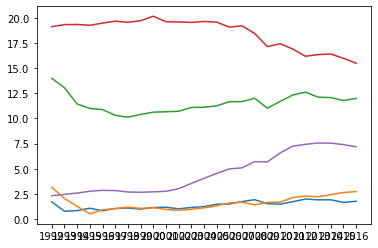

In [87]:
plt.plot(co2)

now of course this looks like garbage. can you explain why?

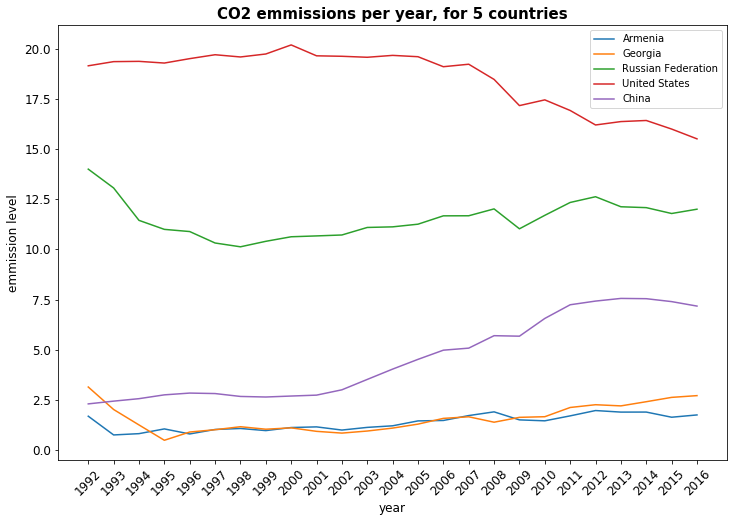

In [142]:
plt.figure(figsize= (12, 8))
plt.plot(co2)
plt.title('CO2 emmissions per year, for 5 countries', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('year', fontsize = 12)
plt.ylabel('emmission level', fontsize = 12)
plt.legend(co2.columns)

now, lets see how it looks as a scatterplot

C:\Users\talin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\talin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\talin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\talin\Anaconda3\

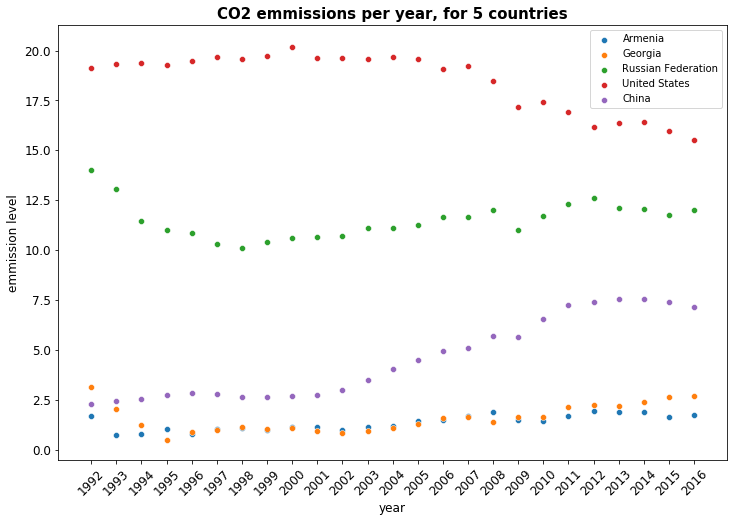

In [141]:
plt.figure(figsize= (12, 8))

for i in countries:
    sns.scatterplot(co2[i].index, co2[i])
    
plt.title('CO2 emmissions per year, for 5 countries', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('year', fontsize = 12)
plt.ylabel('emmission level', fontsize = 12)
plt.legend(co2.columns)

does making it a scatterplot add anything to the understanding of the plot? 

In [89]:
bike = pd.read_csv('data/bikeshare.txt')

#### 2. let's take a look at another dataset now, with different types of values 

In [90]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [91]:
# why are we labeling binary data?

bike['holiday'].replace({0:'no', 1:'yes'}, inplace = True)
bike['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri', 6:'Sat'}, inplace = True)
bike['workingday'].replace({0:'no', 1:'yes'}, inplace = True)
bike['weathersit'].replace({0:'Clear', 1:'Mist', 2:'Light', 3:'Heavy'},inplace = True) 

In [92]:
# grouping by day and aggregating helps the data be a little less granular, so we have daily stats rather than hourly. 
daily_counts = bike.groupby('dteday').agg({'casual': "sum", 'registered' : 'sum', 'workingday' :'last'})

if we want to plot a distribution of casual and registered riders, how should we do that?

C:\Users\talin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\talin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Comparison of Casual vs Registered Riders')

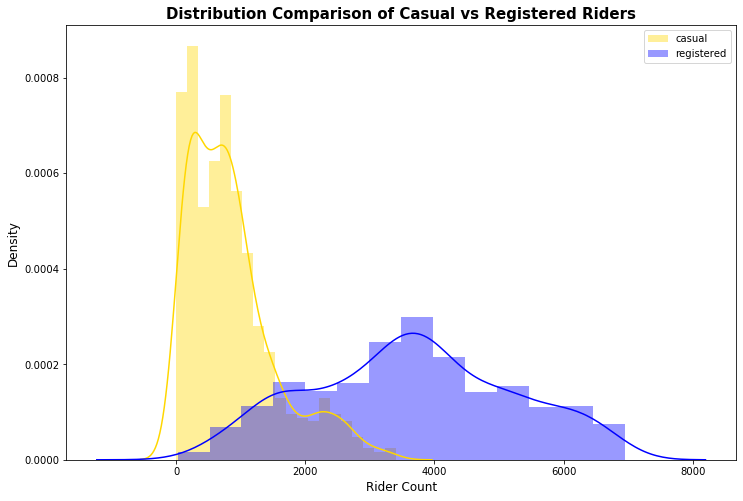

In [146]:
plt.figure(figsize = (12,8))
sns.distplot(daily_counts['casual'], label = 'casual', color = 'gold')
sns.distplot(daily_counts['registered'], label = 'registered', color = 'blue')
plt.legend()
plt.xlabel('Rider Count', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.title('Distribution Comparison of Casual vs Registered Riders',weight='bold' , fontsize = 15)

now, lets make something a little bit more complicated. a jointplot is a useful tool for when you 

Text(0.5, 0.98, 'Casual vs Registered Rider Count')

<Figure size 864x864 with 0 Axes>

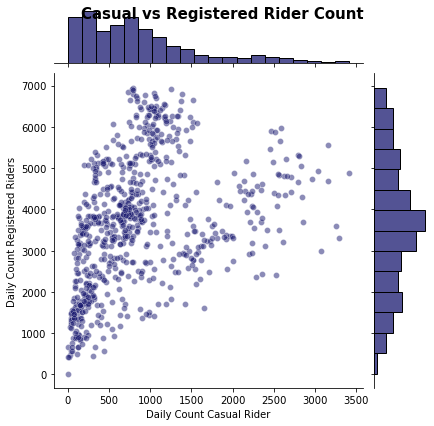

In [149]:
plt.figure(figsize=(12,12))
sns.jointplot(x = 'casual', y = 'registered', data = daily_counts, color = 'midnightblue', alpha = .5).set_axis_labels('Daily Count Casual Rider', 'Daily Count Registered Riders')
plt.suptitle('Casual vs Registered Rider Count', fontsize = 15, weight = 'bold')


lets look at one more type of cool plot-- a kde plot. this is a form of area depiction, with a hint of heatmap behavior. it is meant to visualize distributions, similar to a histogram!

C:\Users\talin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\talin\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\talin\Anaconda3\lib\site-packages\seaborn\distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'fontsize'
  **contour_kws,


Text(0.5, 1.0, 'kdeplot of the daily counts of casual vs registered riders')

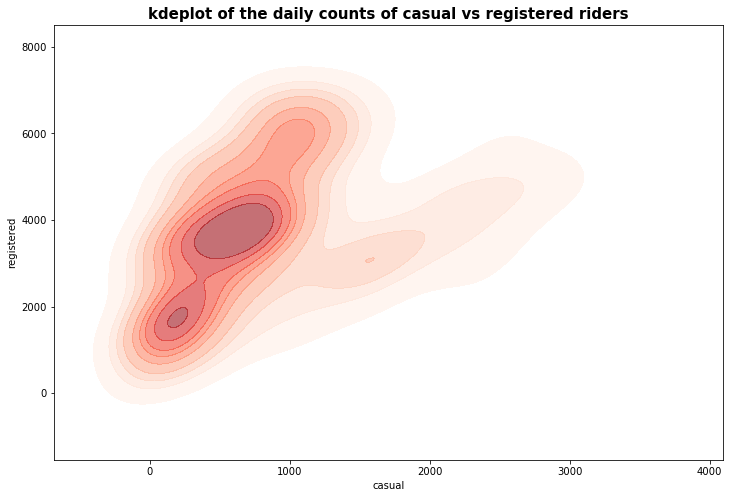

In [153]:
plt.figure(figsize=(12,8))
sns.kdeplot(daily_counts['casual'], daily_counts['registered'], fontsize = 12, cmap="Reds",color = 'coral', alpha = .59, shade=True, shade_lowest=False)
plt.title('kdeplot of the daily counts of casual vs registered riders', fontsize = 15, weight = 'bold')

#### 3. lets take a look at one last type of dataset-- diet data

In [109]:
diet = pd.read_csv('diet.csv')

In [110]:
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [111]:
len(diet)

78

In [112]:
diet.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


In [156]:
bins= np.linspace(15,65,6)


In [160]:
bins

array([15., 25., 35., 45., 55., 65.])

In [161]:
bins= np.linspace(15,65,6)
labels = ['16-26', '26-36', '36-46', '46-56', '56-60']
diet['AgeGroup'] = pd.cut(diet.Age, bins=bins, labels = labels, include_lowest = True)

C:\Users\talin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
diet

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,AgeGroup
2,1,0,22,159,58,1,54.2,16-26
3,2,0,46,192,60,1,54.0,46-56
4,3,0,55,170,64,1,63.3,46-56
5,4,0,33,171,64,1,61.1,26-36
6,5,0,50,170,65,1,62.2,46-56
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,26-36
74,75,1,49,177,84,3,79.9,46-56
75,76,1,28,164,85,3,79.7,26-36
76,77,1,40,167,87,3,77.8,36-46


Text(0.5, 1.0, 'This is Trash!')

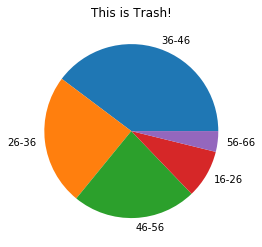

In [117]:
plt.pie(diet['AgeGroup'].value_counts(), labels =diet['AgeGroup'].value_counts().index.tolist())
plt.title('This is Trash!')

Text(0.5, 1.0, 'This is Trash!')

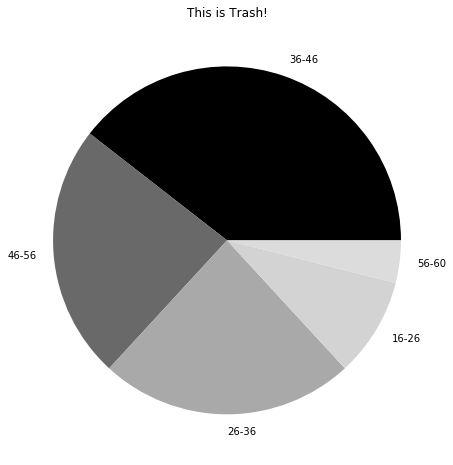

In [165]:
plt.figure(figsize=(12,8))
plt.pie(diet['AgeGroup'].value_counts(), labels =diet['AgeGroup'].value_counts().index.tolist(), colors = ['k','dimgrey','darkgrey','lightgrey','gainsboro'], pctdistance=0.5)

plt.title('This is Trash!')

C:\Users\talin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

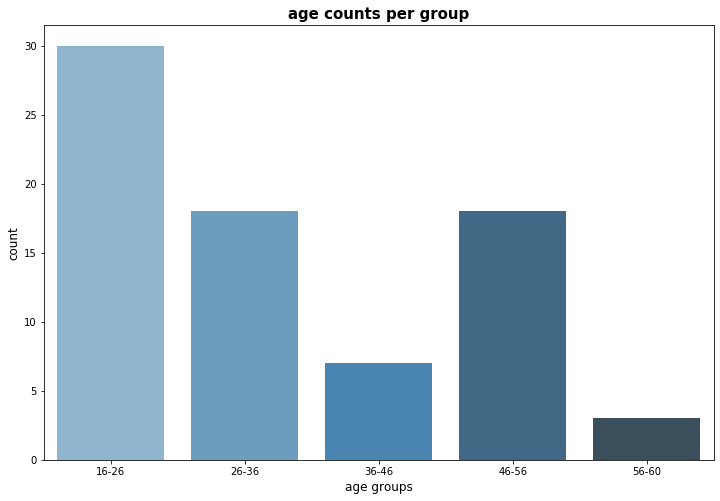

In [170]:
plt.figure(figsize = (12,8))
sns.barplot(diet['AgeGroup'].unique(), diet['AgeGroup'].value_counts(), palette="Blues_d")
plt.title('age counts per group', fontsize = 15, weight = 'bold')
plt.xlabel('age groups', fontsize = 12)
plt.ylabel('count', fontsize =12 )

In [120]:
diet = diet[diet['gender'].isin(['0','1'])]

In [121]:
diet

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,AgeGroup
2,1,0,22,159,58,1,54.2,16-26
3,2,0,46,192,60,1,54.0,46-56
4,3,0,55,170,64,1,63.3,46-56
5,4,0,33,171,64,1,61.1,26-36
6,5,0,50,170,65,1,62.2,46-56
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,26-36
74,75,1,49,177,84,3,79.9,46-56
75,76,1,28,164,85,3,79.7,26-36
76,77,1,40,167,87,3,77.8,36-46


Text(0, 0.5, 'weight')

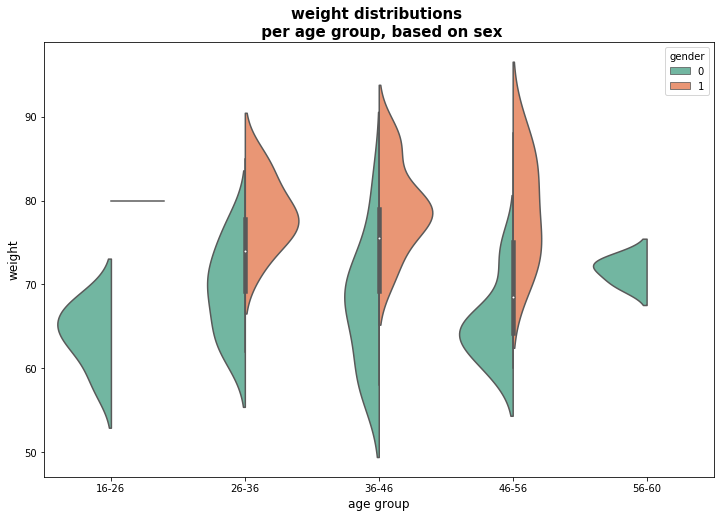

In [173]:
plt.figure(figsize = (12,8))
plt.title('weight distributions \n per age group, based on sex', fontsize = 15, weight = 'bold')
sns.violinplot(x = 'AgeGroup', y = 'pre.weight', data = diet, hue = 'gender', split=True, palette = 'Set2')
plt.xlabel('age group', fontsize = 12)
plt.ylabel('weight', fontsize = 12)

Text(0, 0.5, 'weight')

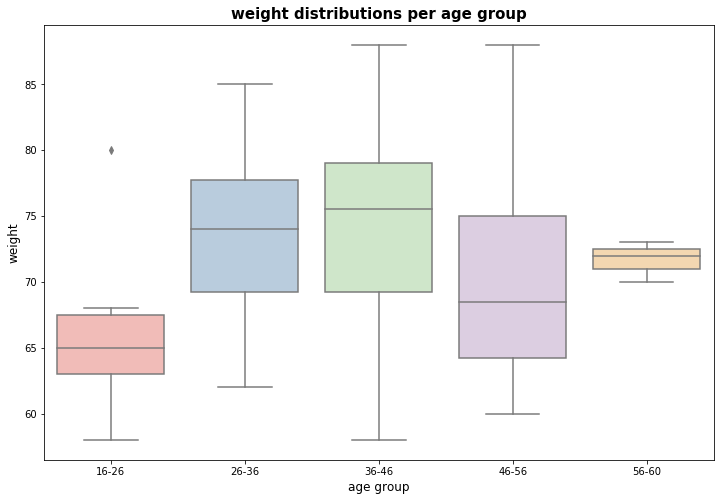

In [174]:
plt.figure(figsize = (12,8))
plt.title('weight distributions per age group', fontsize = 15, weight = 'bold')
sns.boxplot(x = 'AgeGroup', y = 'pre.weight', data = diet, palette='Pastel1')
plt.xlabel('age group', fontsize = 12)
plt.ylabel('weight', fontsize = 12)

challenge: what would be a good plot to use to visualize the difference in pre.weight for the three different types of diet?